# Ordinary Differential Equations Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Lorenz system

The [Lorenz system](http://en.wikipedia.org/wiki/Lorenz_system) is one of the earliest studied examples of a system of differential equations that exhibits chaotic behavior, such as bifurcations, attractors, and sensitive dependence on initial conditions. The differential equations read:

$$ \frac{dx}{dt} = \sigma(y-x) $$
$$ \frac{dy}{dt} = x(\rho-z) - y $$
$$ \frac{dz}{dt} = xy - \beta z $$

The solution vector is $[x(t),y(t),z(t)]$ and $\sigma$, $\rho$, and $\beta$ are parameters that govern the behavior of the solutions.

Write a function `lorenz_derivs` that works with `scipy.integrate.odeint` and computes the derivatives for this system.

In [2]:
def lorentz_derivs(yvec, t, sigma, rho, beta):
    """Compute the the derivatives for the Lorentz system at yvec(t)."""
    # YOUR CODE HERE
    x = yvec[0]
    y = yvec[1]
    z = yvec[2]
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])
print(lorentz_derivs(np.array([0.0, 1.0, 0.0]), 1, 1, 1, 1))

[ 1. -1.  0.]


In [3]:
assert np.allclose(lorentz_derivs((1,1,1),0, 1.0, 1.0, 2.0),[0.0,-1.0,-1.0])

Write a function `solve_lorenz` that solves the Lorenz system above for a particular initial condition $[x(0),y(0),z(0)]$. Your function should return a tuple of the solution array and time array.

In [4]:
def solve_lorentz(ic, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Solve the Lorenz system for a single initial condition.
    
    Parameters
    ----------
    ic : array, list, tuple
        Initial conditions [x,y,z].
    max_time: float
        The max time to use. Integrate with 250 points per time unit.
    sigma, rho, beta: float
        Parameters of the differential equation.
        
    Returns
    -------
    soln : np.ndarray
        The array of the solution. Each row will be the solution vector at that time.
    t : np.ndarray
        The array of time points used.
    
    """
    # YOUR CODE HERE
    t = np.linspace(0, max_time, 5*max_time)
    soln = odeint(lorentz_derivs, ic, t, args=(sigma, rho, beta), atol=1e-9, rtol=1e-8)
    return np.array(soln), np.array(t)
print(solve_lorentz(np.array([0.0, 1.0, 0.0]), 2, 1, 1, 1))

(array([[ 0.        ,  1.        ,  0.        ],
       [ 0.1794012 ,  0.82040497,  0.0173453 ],
       [ 0.2942639 ,  0.70368555,  0.05030095],
       [ 0.36728551,  0.62561417,  0.0842775 ],
       [ 0.41284758,  0.57135084,  0.1140818 ],
       [ 0.44016931,  0.53197815,  0.13826168],
       [ 0.45525403,  0.5021364 ,  0.15683978],
       [ 0.462077  ,  0.4785751 ,  0.17038914],
       [ 0.46331358,  0.45929438,  0.17964867],
       [ 0.46079091,  0.44304037,  0.18536218]]), array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ]))


In [5]:
assert True # leave this to grade solve_lorenz

Write a function `plot_lorentz` that:

* Solves the Lorenz system for `N` different initial conditions. To generate your initial conditions, draw uniform random samples for `x`, `y` and `z` in the range $[-15,15]$. Call `np.random.seed(1)` a single time at the top of your function to use the same seed each time.
* Plot $[x(t),z(t)]$ using a line to show each trajectory.
* Color each line using the `hot` colormap from Matplotlib.
* Label your plot and choose an appropriate x and y limit.

The following cell shows how to generate colors that can be used for the lines:

In [6]:
N = 5
colors = plt.cm.hot(np.linspace(0,1,N))
for i in range(N):
    # To use these colors with plt.plot, pass them as the color argument
    print(colors[i])

[ 0.0416  0.      0.      1.    ]
[ 0.70047002  0.          0.          1.        ]
[ 1.         0.3593141  0.         1.       ]
[ 1.          1.          0.02720491  1.        ]
[ 1.  1.  1.  1.]


In [15]:
def plot_lorentz(N=10, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """Plot [x(t),z(t)] for the Lorenz system.
    
    Parameters
    ----------
    N : int
        Number of initial conditions and trajectories to plot.
    max_time: float
        Maximum time to use.
    sigma, rho, beta: float
        Parameters of the differential equation.
    """
    # YOUR CODE HERE
    plt.figure(figsize = (15,8))
    np.random.seed(1)
    k= []
    for i in range(N):
        data = (np.random.random(3)-0.5)*30
        k.append(solve_lorentz(data, max_time, sigma, rho, beta))
    for j in k:
        x = [p[0] for p in j[0]]
        z = [p[2] for p in j[0]]
        color = plt.cm.hot((x[0] + z[0])/60+0.5)
        plt.scatter(x, z, color = color)
    plt.xlabel('$x(t)$')
    plt.ylabel('$z(t)$')
    plt.title('Lorentz System')
# print(plot_lorentz(N=10, max_time=4.0, sigma=10.0, rho=28.0, beta=8.0/3.0))

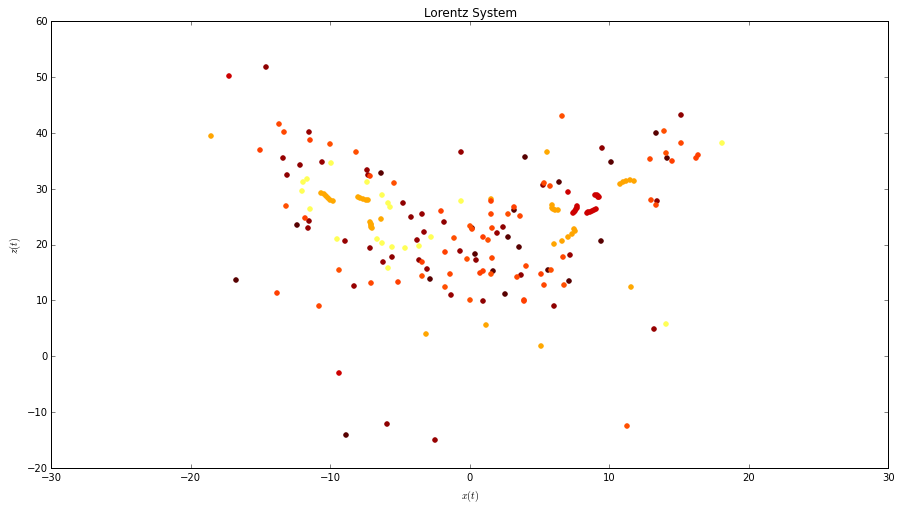

In [16]:
plot_lorentz()

In [17]:
assert True # leave this to grade the plot_lorenz function

Use `interact` to explore your `plot_lorenz` function with:

* `max_time` an integer slider over the interval $[1,10]$.
* `N` an integer slider over the interval $[1,50]$.
* `sigma` a float slider over the interval $[0.0,50.0]$.
* `rho` a float slider over the interval $[0.0,50.0]$.
* `beta` fixed at a value of $8/3$.

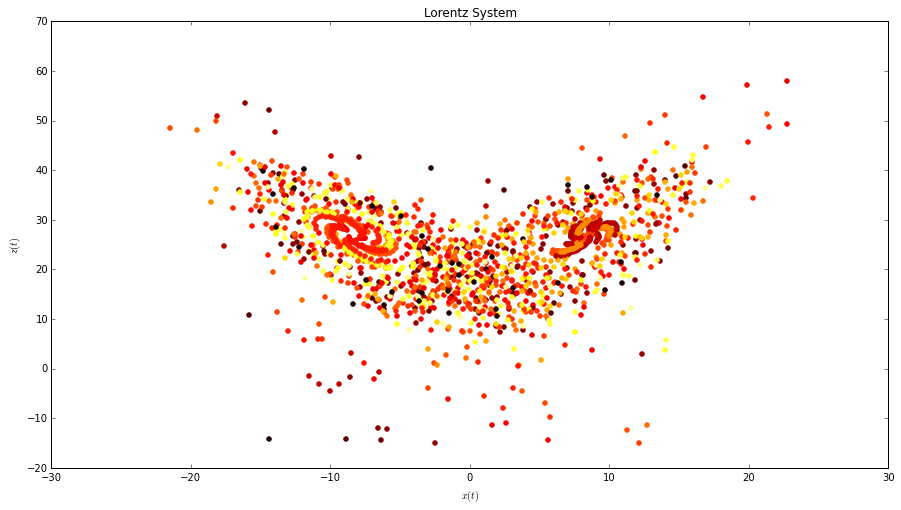

In [18]:
# YOUR CODE HERE
interact(plot_lorentz, max_time = [1,10], N = [1,50], sigma=[0.0,50.0], rho=[0.0,50.0], beta=fixed(8/3));

Describe the different behaviors you observe as you vary the parameters $\sigma$, $\rho$ and $\beta$ of the system:

YOUR ANSWER HERE